In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0])

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [2]:
clf.predict_proba(X[:2, :])
clf.score(X, y)

0.9733333333333334

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)


1.0

In [6]:
print(reg.coef_)

print(reg.intercept_)


[1. 2.]
3.0000000000000018


In [7]:
reg.predict(np.array([[3, 5]]))

array([16.])

In [8]:
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [9]:
y

array([ 6,  8,  9, 11])

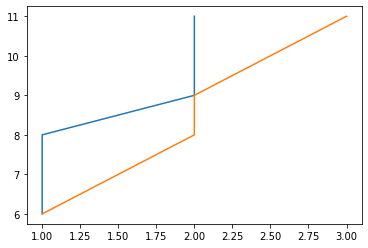

In [14]:
import matplotlib.pyplot as plt

plt.plot(X,y)

In [23]:
import pymysql
import pandas as pd


class Conexion:
    def __init__(self):
        self.host='127.0.0.1'
        self.user='root'
        self.password=''
        self.db='employees'


    def conectar(self):
        try:
            conexion = pymysql.connect(host=self.host,user=self.user,password=self.password,db=self.db)
            #return conexion
            with conexion.cursor() as cursor:
                consulta = "SELECT emp_no, last_name FROM employees WHERE gender ='F';"
                cursor.execute(consulta)
 
                # Con fetchall traemos todas las filas
                employees = cursor.fetchall()
 
                # Recorrer e imprimir
                for emp in employees:
                    print(emp)
        finally:
            conexion.close()

        except (pymysql.err.OperationalError, pymysql.err.InternalError) as e:
            print("Ocurrió un error al conectar: ", e)

conn = Conexion()
conn.conectar()
#creo el sql
sql = "SELECT from_date, salary FROM `salaries` WHERE emp_no >= 10001 and emp_no < 20000"
#ejecuto el sql y lo cargo en el array de clientes
with conn.cursor() as cursor:
    cursor.execute(sql)
    # Con fetchall traemos todas las filas
    employees = cursor.fetchall()

#df = pd.read_sql_query(sql, conn)
print(employees)

SyntaxError: invalid syntax (<ipython-input-23-764678565beb>, line 30)

In [55]:
import pymysql
try:
    conexion = pymysql.connect(host='localhost',
                             user='root',
                             password='',
                             db='employees')
    try:
        with conexion.cursor() as cursor:
            consulta = "SELECT from_date, salary FROM `salaries` WHERE emp_no >= 10001 and emp_no < 20000 and salary > 100000"
            cursor.execute(consulta)
 
            # Con fetchall traemos todas las filas
            employees = cursor.fetchall()
 
            # Recorrer e imprimir
            #for emp in employees:
            #    print(emp)
            df = pd.read_sql(consulta, conexion)
            
    finally:
        conexion.close()
    
except (pymysql.err.OperationalError, pymysql.err.InternalError) as e:
    print("Ocurrió un error al conectar: ", e)

In [56]:
df.tail(30)

,from_date,salary
3201,2001-12-27,116007
3202,1990-02-03,103229
3203,1991-02-03,103043
3204,1992-02-03,105978
3205,1993-02-02,110291
3206,1994-02-02,112730
3207,1995-02-02,114231
3208,1996-02-02,117799
3209,1997-02-01,119999
3210,1998-02-01,122175


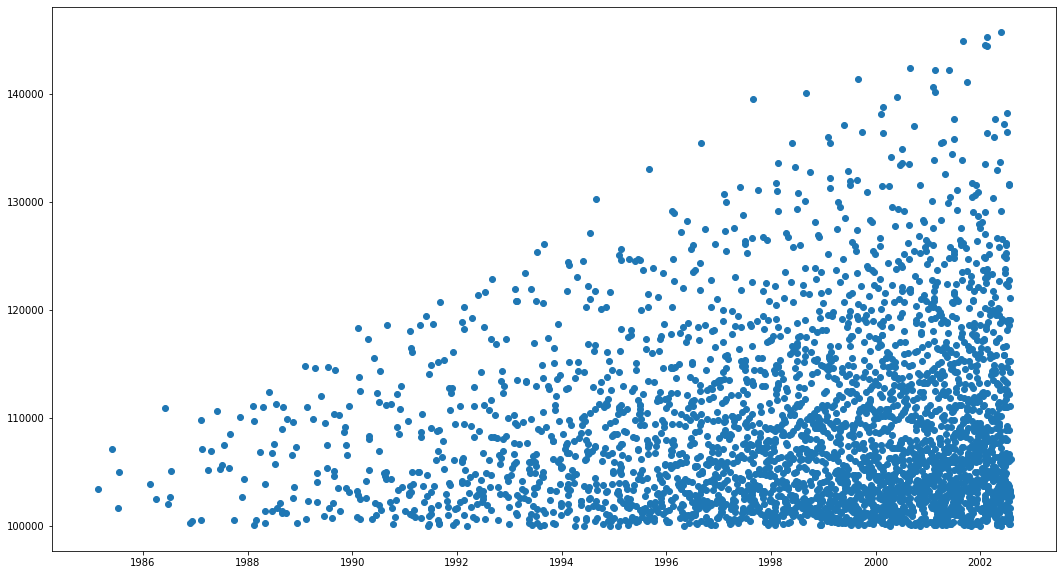

In [57]:
x = np.array(df.from_date)
X1 = np.array(df.index)
y = np.array(df.salary)
fig = plt.figure(figsize=(18,10))
plt.scatter(x,y)

In [61]:
df.describe()

,salary
count,3231.000000
mean,109066.073971
std,8047.155638
min,100001.000000
25%,102932.500000
50%,106657.000000
75%,113089.500000
max,145732.000000


In [58]:
X1.reshape(-1, 1)

array([[   0],
       [   1],
       [   2],
       ...,
       [3228],
       [3229],
       [3230]], dtype=int64)

In [59]:
import sklearn.linear_model as sk

reg = sk.LinearRegression().fit(X1.reshape(-1,1), y)
reg.score(X1.reshape(-1,1), y)

0.0005425427321145149

In [60]:
X1.reshape(-1,1)

array([[   0],
       [   1],
       [   2],
       ...,
       [3228],
       [3229],
       [3230]], dtype=int64)

In [50]:
X1

array([    0,     1,     2, ..., 94909, 94910, 94911], dtype=int64)